# Naive Bayes Classifier

In [1]:
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1)
# summarize
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(200, 2) (200,)
[[-10.8278844   -4.83392615]
 [-11.18003063  -4.61910307]
 [-10.55520723  -3.0141798 ]
 [ -1.42706535   5.08904128]
 [ -8.16299488  -3.38896569]]
[1 1 1 0 1]


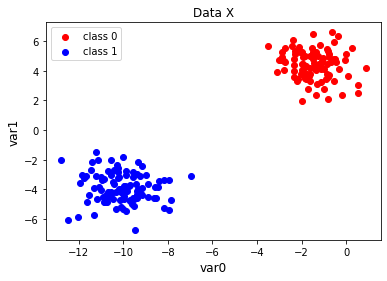

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X[y == 0, 0], X[y == 0, 1], c = 'red', label='class 0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], c = 'blue', label='class 1')
ax.set_title('Data X')
ax.set_xlabel('var0', fontsize=12)
ax.set_ylabel('var1', fontsize=12)
ax.legend()

In [4]:
# Sort data into 2 datasets
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)

(100, 2) (100, 2)


In [5]:
# Calculate prior probabilities
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
print(priory0, priory1)

0.5 0.5


In [6]:
from scipy.stats import norm
from numpy import mean
from numpy import std
from numpy import log

# Fit a probability distribution to a univariate data sample
def fit_distribution(data):
    mu = mean(data)
    sigma = std(data)
    print(mu, sigma)
    dist = norm(mu, sigma)
    return dist

In [7]:
# Create probability distribution functions for all datasets
X0y0 = fit_distribution(Xy0[:, 0])
X1y0 = fit_distribution(Xy0[:, 1])

X0y1 = fit_distribution(Xy1[:, 0])
X1y1 = fit_distribution(Xy1[:, 1])

-1.453156696730447 0.8497391581403734
4.40756967408747 0.9448501199593555
-10.082794464327042 1.0642444414521337
-3.895339971286504 1.004435942839403


In [10]:
# Calculate the independent conditional probability
def get_class_score(example, prior, dist1, dist2):
    return log(prior) + log(dist1.pdf(example[0])) + log(dist2.pdf(example[1]))

In [12]:
# Create one sample
example, label = X[0], y[0]
py0 = get_class_score(example, priory0, X0y0, X1y0)
py1 = get_class_score(example, priory1, X0y1, X1y1)
print('P(y=0 | %s) = %.3f' % (example, py0*100))
print('P(y=1 | %s) = %.3f' % (example, py1*100))
print(f'True class: {label}')

P(y=0 | [-10.8278844   -4.83392615]) = -11100.236
P(y=1 | [-10.8278844   -4.83392615]) = -327.938
True class: 1


In [14]:
print(X0y0.pdf(example[0]))
print(X1y0.pdf(example[0]))
print(X0y1.pdf(example[0]))
print(X1y1.pdf(example[0]))

1.743528016750847e-27
1.4647211929149902e-57
0.29338140322424655
1.798165887778909e-11
